<a href="https://colab.research.google.com/github/emad550/AI_DS/blob/main/CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from tensorflow.keras import datasets
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

# STEP ONE
> Save a copy of the Notebook in your gdrive that you will share it and allow commenting!

# Homework Rules
- get the 10/10 homework grade if:
    - the homework is complete
- get feedback on your solution if so and pro tips if:
    - submitted before the deadline whether the competition or the homework

# Competition rules | Bonus
- the top 3 scores get 10 bonus 20/10
- top 5 get score of 5 bonus 15/10
- top 7 get score of 3 bonus 13/10
- top 10 get score of 3 bonus 11/10
- else is considered a homework submission grade 10/10 if completed and scored above 65% validation accuracy!
- you can use whatever works from regularization techniques if you will
- competition and homework must solve the CIFAR10 dataset
- `The homework deadline is Sunday 14/2/2021 11:59:00 PM won't consider after that`
> ### Remember
> your bonus history is considered for the LinkedIn recommendation for top performers

# project outcomes
- get hands on Tensorflow/Keras
- you are not allowed to use transfer learning.
- any use of pretrained model will be ignored i.e. will not be graded
- get hands on solving the image recognition problem
- will help you get confidence on a harder data
- you have something to tell people that you managed to do
- search for a better solutions that may improve your model
- understanding each part of the network and how it impacts your result


# Import your modules

In [ ]:
# hint where to find keras sub-modules
# -----------------------------------
# |———————<datasets>
# |  └─────────<cifar10>
# |———————<models>
# |  └─────────<Sequential>
# |———————<layers>
# |  ├─────────<Conv2D>
# |  └─────────<Dense>
# |———————<utils>
# |  ├─────────<to_categorical>
# |  └─────────<plot_model>
# |———————<callbacks>
# |  ├─────────<EarlyStopping>
# |  ├─────────<ModelCheckpoint>
# |  └─────────<ReduceLROnPlateau>
# |———————<optimizers>
#    └─────────<Adam>

# do your imports here






# Load the CIFAR10 data from keras
This is one of the popular datasets for the image recognition task specially in the early researchs even popular CNN architectures like Resnet50 scored 95% acc on this data so don't worry if you couldn't achieve high results.

use that dictionary to name the classes
```python
id2class = {
    "0": "airplane", "1": "automobile", "2": "bird", 
    "3": "cat", "4": "deer", "5": "dog", "6": "frog", 
    "7": "hourse", "8": "ship", "9": "truck"
}
```

> visualize some random images using the helper function **`plot_batch`** below!

you can use this code to generate a random batch ids

```python
>>> random_ids = np.random.randint(0, 1000, BATCH_SIZE)

```
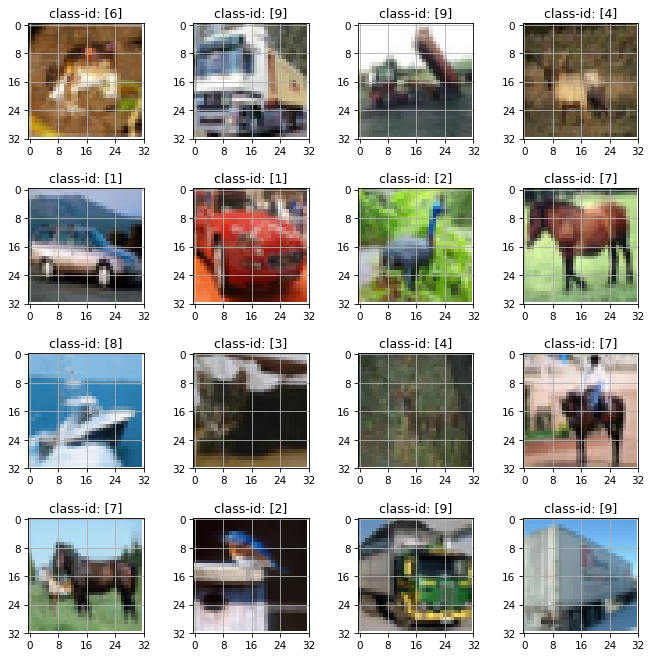

In [6]:
def plot_batch(X, Y, figSize=(9, 9), dpi=75, cells_per_col=4, color=None):
    """
    This function plots a batch of the raw images with its true targets

    Parameters
    ----------
    X : (np.ndarray)
        batch of images to classify and plot

    Y : (np.ndarray)
        batch of predicted labels

    figSize : (tuple)
        initialize the figure size

    dpi : (int)
        increase/decrease zoom of subplots

    cells_per_col : (int)
        max number of columns in the figure

    color : (str)
        change the color map of the image plot
    """
    
    m = len(X)  # length of the batch
    img_size = X[0].shape
    fig = plt.figure(figsize=figSize, dpi=dpi)  
    for i in range(m):  # for each img in the batch
        class_id = Y[i] # get the current image true value 
        axis = fig.add_subplot(round(m/cells_per_col), cells_per_col, i+1) # display a grid of subplots
        axis.imshow(X[i], cmap=color)                   # plot each image
        axis.set_title("class-id: " + str(class_id))    # set the title of the img with the ture value
        axis.set_xticks(np.linspace(0, img_size[1], 5)) # scale the x-axis to match the image width
        axis.set_yticks(np.linspace(0, img_size[0], 5)) # scale the y-axis to match the image height
        axis.grid()
    fig.tight_layout(pad=1.5)
    plt.show()

In [2]:
# load the dataset here
(Xtrain, Ytrain), (Xtest, Ytest) = datasets.cifar10.load_data()



# load the dataset here and print the train/test shapes of the images/targets

print("Xtrain: ", Xtrain.shape)
print("Ytrain: ", Ytrain.shape)
print("Xtest: ", Xtest.shape)
print("Ytest: ", Ytest.shape)




170500096/170498071 [==============================] - 4s 0us/step
Xtrain:  (50000, 32, 32, 3)
Ytrain:  (50000, 1)
Xtest:  (10000, 32, 32, 3)
Ytest:  (10000, 1)


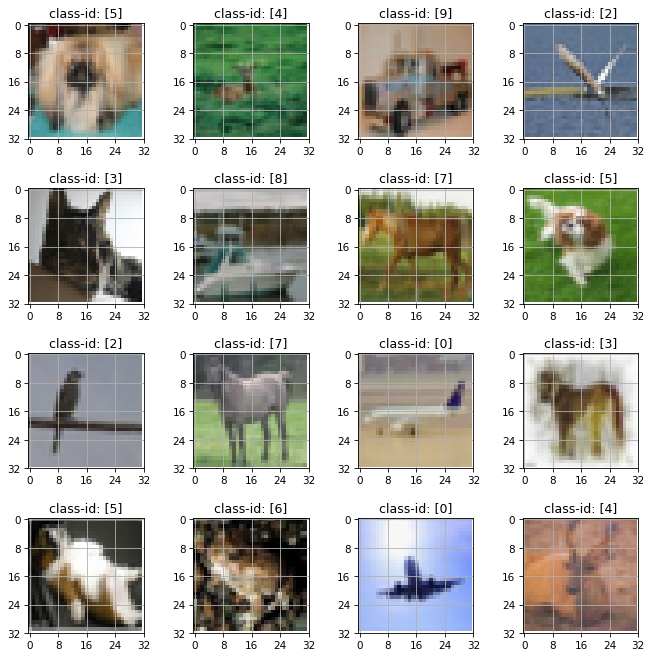

In [7]:
# index a random batch of the images, targets array and plot it
rand_ids = np.random.randint(0, 50000, 16)
X_rand_batch = Xtrain[rand_ids]
Y_rand_batch = Ytrain[rand_ids]


plot_batch(X_rand_batch, Y_rand_batch, color="gray")

# preprocess the images and target arrays
* scale the images pixels from $[0:1]$
* reshape `"flatten"` the images into the proper shape the ANN will expect
* one hot encode the targets to match the neuarl network output


In [8]:
# rescale the images pixels values

print("before scaling: ", Xtrain.max(), Xtrain.min())
Xtrain = Xtrain / 255.
Xtest = Xtest / 255.


# print the min and max values in the images array

print("after scaling: ", Xtrain.max(), Xtrain.min())



# split the train into train/validation print their shapes 






before scaling:  255 0
after scaling:  1.0 0.0


In [28]:
# one hot encode the target vectors

print("before encoding: ", Ytrain.shape)
Ytrain = utils.to_categorical(Ytrain, num_classes=10)
Ytest = utils.to_categorical(Ytest, num_classes=10)
print("after encoding: ", Ytrain.shape)


# print the new shape of the targets






before encoding:  (50000, 1)
after encoding:  (50000, 10)


# Build the Network (ANN)

<img width="100%" src="https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png?fit=1400%2C658&ssl=1">

> choose whatever works for you to build the network as we did in the class
using the [Sequential](https://www.tensorflow.org/guide/keras/sequential_model), [Functional](https://www.tensorflow.org/guide/keras/functional), or [subclass](https://www.tensorflow.org/guide/keras/custom_layers_and_models#the_model_class) model from [TF2](https://www.tensorflow.org/) try different number of layers, neurons per layer and different activation functions &rarr; [here](https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253), or [here](https://www.geeksforgeeks.org/activation-functions-neural-networks/)


use `model.summary()` or [plot_model](https://keras.io/api/utils/model_plotting_utils/) to visualize your model conncections


In [15]:
# build the network here

model = models.Sequential([
    # --------------- Feature extractor Network -----------------------
    layers.Conv2D(32, 3, strides=(1, 1), padding="same", activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPool2D((2, 2), strides=(2, 2)),
    layers.Conv2D(64, 3, strides=(1, 1), padding="same", activation="relu"),
    layers.MaxPool2D((2, 2), strides=(2, 2)),
    layers.Conv2D(64, 3, strides=(1, 1), padding="same", activation="relu"),
    layers.MaxPool2D((2, 2), strides=(2, 2)),
    layers.Conv2D(128, 3, strides=(1, 1), padding="same", activation="relu"),
    layers.MaxPool2D((2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])



# visualize the network

model.summary()




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 128)        

# Configure the Loss/optimizer/metric

> use the [model.compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) to do that and specify the model arguments (loss=, metrics=, optimizer=)

> adam is not a dark magic works for everything you may try other [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) that can achieve more better, so
read more about the optimizers from [here](https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6), or [here](https://heartbeat.fritz.ai/exploring-optimizers-in-machine-learning-7f18d94cd65b) if you are curious about maths behind and I highly encourage doing so!

you can pass the **`optimizer argument`** as (str) &rarr; "Adam", or creating object from the optimizer class Adam(learning_rate=) if so choose a suitable **`lr`** value between $[10^{-2}:10^{-5}]$

for the **`metrics`** argument please specify at least the "accuracy" so I can score your model and set the bonus for the validation/test accuracy so monitore them in your callbacks

In [16]:
# configure the loss and optimizer and the metrics for the training

model.compile(optimizer=optimizers.Adam(1e-2), loss="categorical_crossentropy", metrics=["accuracy"])



# Configure the training callbacks if any

open sugguestions [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks)
- **`class EarlyStopping`**: Stop training when a monitored metric has stopped improving.
- **`class ModelCheckpoint`**: Callback to save the Keras model or model weights at some frequency.
- **`class ReduceLROnPlateau`**: Reduce learning rate when a metric has stopped improving.

**`hint`**
> use small patience relative to eh epochs at the begining and monitor the validation [acc]

so you can stop the model early and tweak it better then rerun you will do that several times until you think it is the best way possible!



In [ ]:
# configure the training callbacks if any





# Train the network

> use small number of epochs at the begining to allow you to edit the model faster
\
once you think you got a good model configs increase the epochs to a reasonable number between 100:1000 not less not more.

choose the values that works best for you of the training rules:
- **`epochs`**: iterations for each the model will see all the data
- **`batch_size`**: the number of batches for your optimizer {stochastic/mini_batch/full_batch} ensure that it matches the memory size
- **`validation_split`**: the ratio to split the training data into train/validation
- **`callbacks`**: the functions to apply within the training loop

> don't forget to save the history of the training you can use a callback for that or:
```python
    >>>> history = model.fit(...)
```


In [17]:
# feed the data and train the network


history = model.fit(
    Xtrain, encoded_Ytrain,
    batch_size=32,
    epochs=10,
    validation_split=0.2
)


Epoch 1/10
1250/1250 [==============================] - 91s 72ms/step - loss: 2.3270 - accuracy: 0.1023 - val_loss: 2.3036 - val_accuracy: 0.0977
Epoch 2/10
1250/1250 [==============================] - 92s 73ms/step - loss: 2.3037 - accuracy: 0.1020 - val_loss: 2.3033 - val_accuracy: 0.1014
Epoch 3/10
1250/1250 [==============================] - 93s 74ms/step - loss: 2.3039 - accuracy: 0.0997 - val_loss: 2.3037 - val_accuracy: 0.1025
Epoch 4/10
1250/1250 [==============================] - 91s 73ms/step - loss: 2.3042 - accuracy: 0.1010 - val_loss: 2.3030 - val_accuracy: 0.0980
Epoch 5/10
1250/1250 [==============================] - 91s 73ms/step - loss: 2.3037 - accuracy: 0.0985 - val_loss: 2.3042 - val_accuracy: 0.0997
Epoch 6/10
1250/1250 [==============================] - 91s 73ms/step - loss: 2.3040 - accuracy: 0.0984 - val_loss: 2.3053 - val_accuracy: 0.0977
Epoch 7/10
1250/1250 [==============================] - 93s 74ms/step - loss: 2.3044 - accuracy: 0.0989 - val_loss: 2.3043 -

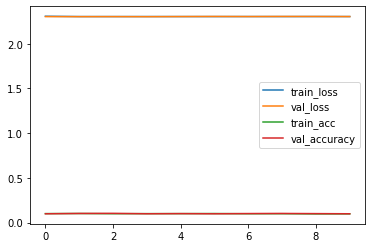

In [25]:
# plot the loss history [train_loss, validation_loss] in a plot





# plot the accuracy history [train_acc, val_acc] in a plot in a separate plot

plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.legend()


# save the model into tf file and the history to a csv file

save it using [tensorflow.keras.models.save_model()](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model#expandable-1)


```python
        tf.keras.models.save_model(
        model, filepath, overwrite=True, include_optimizer=True, save_format=None,
        signatures=None, options=None, save_traces=True
    )

```
**`model`** 	Keras model instance to be saved.
\
**`filepath`** 	One of the following:
String or pathlib.Path object, path where to save the model
h5py.File object where to save the model 
\
**`overwrite`** 	Whether we should overwrite any existing model at the target location, or **`instead`** ask the user with a manual prompt.
\
**`include_optimizer`** 	If True, save optimizer's state together.
\
**`save_format`** 	Either 'tf' or 'h5', indicating whether to save the model to Tensorflow SavedModel or HDF5. Defaults to 'tf' in TF 2.X. 
\
\
\
you can load it using [tensorflow.keras.models.load_model()](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model)


```python

    tf.keras.models.load_model(
        filepath, custom_objects=None, compile=True, options=None
    )

```

**`filepath`** 	One of the following:
String or pathlib.Path object, path to the saved model
h5py.File object from which to load the model 
\
**`custom_objects`** 	Optional dictionary mapping names (strings) to custom classes or functions to be considered during deserialization.
\
**`compile`** 	Boolean, whether to compile the model after loading.
\
**`options`** 	Optional tf.saved_model.LoadOptions object that specifies options for loading from SavedModel. 
\

# Evaluate the model on testing data



In [30]:
# print the accuracy, and loss scores on testing dataset
train_res = model.evaluate(Xtrain, Ytrain)
test_res = model.evaluate(Xtest, Ytest)

print("-"*50, "\n")
print(f"train_loss: {train_res[0]:.3f}", "\t", f"test_loss: {test_res[0]:.3f}")
print(f"train_acc: {train_res[1]:.3f}", "\t", f"test_acc: {test_res[1]:.3f}")




313/313 [==============================] - 6s 20ms/step - loss: 2.3035 - accuracy: 0.1000
-------------------------------------------------- 

train_loss: 2.304 	 test_loss: 2.304
train_acc: 0.100 	 test_acc: 0.100


# Predict a batch from the test dataset and plot it 

> use Ypred_batch = [model.predict(Xtest_batch)](https://www.tensorflow.org/api_docs/python/tf/keras/Model)
\
 use `plot_batch(Xtest_batch, Ypred_batch)` to plot a test X &rarr; images batch, Y &rarr; predicted targets
 
make sure that the final Ypred_batch is array of int values of shape of (N, 1), or (N,) not (N, 10)
\
use batch size of 16 to index the test data and pass it to plot_batch

In [ ]:
# create a Xtest_batch



# predict the Ypred_batch
Ypred_batch = model.predict(Xtest_batch)


# plot the predicted batch

plot_batch(Xtest_batch, Ypred_batch)

